[Text(0.5, 0.75, 'dummify__shelf_location_Good <= 0.5\nsamples = 400\nvalue = [164, 236]\nclass = Low'),
 Text(0.25, 0.25, 'samples = 315\nvalue = [98, 217]\nclass = Low'),
 Text(0.75, 0.25, 'samples = 85\nvalue = [66, 19]\nclass = High')]

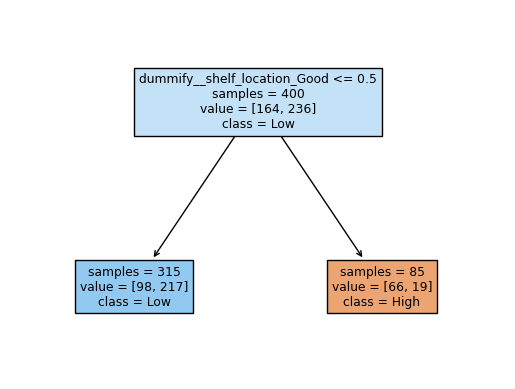

In [3]:
#### Interpretability vs. Complexity ####

# Importing necessary libraries
import pandas as pd
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Import data
data = pd.read_csv('carseats.csv')

# Model piece to handle categorical variables
column_transformer = ColumnTransformer(
  [
    ('dummify', OneHotEncoder(sparse_output = False), ['shelf_location', 'urban', 'us']),
  ],
  remainder = 'passthrough'
)

x_train = data.drop(['sales', 'sales_cat'], axis=1)
y_train = data['sales_cat'].astype('category').cat.codes


## Classification Tree (Max Depth = 1)
tree_pipeline = Pipeline(
  [('preprocessing', column_transformer),
    ('tree', DecisionTreeClassifier(max_depth=1))]
).set_output(transform='pandas')

# Fit and plot tree
tree_fitted = tree_pipeline.fit(x_train, y_train)
tree.plot_tree(tree_fitted['tree'], feature_names = list(column_transformer.transform(X_train).columns),
                filled = True, class_names = sorted(list(data['sales_cat'].unique())), impurity = False
    )

[Text(0.6346153846153846, 0.9166666666666666, 'dummify__shelf_location_Good <= 0.5\nsamples = 400\nvalue = [164, 236]\nclass = Low'),
 Text(0.4230769230769231, 0.75, 'remainder__price <= 92.5\nsamples = 315\nvalue = [98, 217]\nclass = Low'),
 Text(0.23076923076923078, 0.5833333333333334, 'remainder__income <= 57.0\nsamples = 46\nvalue = [32, 14]\nclass = High'),
 Text(0.15384615384615385, 0.4166666666666667, 'dummify__shelf_location_Medium <= 0.5\nsamples = 10\nvalue = [3, 7]\nclass = Low'),
 Text(0.07692307692307693, 0.25, 'samples = 7\nvalue = [0, 7]\nclass = Low'),
 Text(0.23076923076923078, 0.25, 'samples = 3\nvalue = [3, 0]\nclass = High'),
 Text(0.3076923076923077, 0.4166666666666667, 'samples = 36\nvalue = [29, 7]\nclass = High'),
 Text(0.6153846153846154, 0.5833333333333334, 'remainder__advertising <= 13.5\nsamples = 269\nvalue = [66, 203]\nclass = Low'),
 Text(0.46153846153846156, 0.4166666666666667, 'remainder__competitor_price <= 124.5\nsamples = 224\nvalue = [41, 183]\nclas

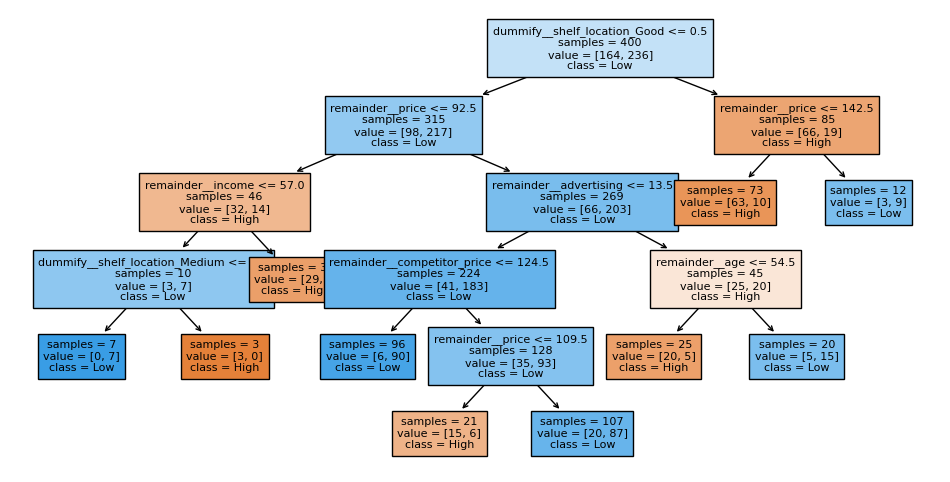

In [4]:
## Classification Tree (Max Depth = 5)
tree_pipeline = Pipeline(
  [('preprocessing', column_transformer),
    ('tree', DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10))]
).set_output(transform='pandas')

# Fit and plot tree
tree_fitted = tree_pipeline.fit(X_train, y_train)

plt.figure(figsize=(12,6)) #adjust width and height of the figure to make your tree readable
tree.plot_tree(tree_fitted['tree'], feature_names = list(column_transformer.transform(X_train).columns),
                filled = True, class_names = sorted(list(data['sales_cat'].unique())), impurity = False, fontsize = 8
    )

[Text(0.600609756097561, 0.95, 'dummify__shelf_location_Good <= 0.5\nsamples = 400\nvalue = [164, 236]\nclass = Low'),
 Text(0.29878048780487804, 0.85, 'remainder__price <= 92.5\nsamples = 315\nvalue = [98, 217]\nclass = Low'),
 Text(0.14634146341463414, 0.75, 'remainder__income <= 57.0\nsamples = 46\nvalue = [32, 14]\nclass = High'),
 Text(0.0975609756097561, 0.65, 'dummify__shelf_location_Medium <= 0.5\nsamples = 10\nvalue = [3, 7]\nclass = Low'),
 Text(0.04878048780487805, 0.55, 'samples = 7\nvalue = [0, 7]\nclass = Low'),
 Text(0.14634146341463414, 0.55, 'samples = 3\nvalue = [3, 0]\nclass = High'),
 Text(0.1951219512195122, 0.65, 'samples = 36\nvalue = [29, 7]\nclass = High'),
 Text(0.45121951219512196, 0.75, 'remainder__advertising <= 13.5\nsamples = 269\nvalue = [66, 203]\nclass = Low'),
 Text(0.2926829268292683, 0.65, 'remainder__competitor_price <= 124.5\nsamples = 224\nvalue = [41, 183]\nclass = Low'),
 Text(0.24390243902439024, 0.55, 'samples = 96\nvalue = [6, 90]\nclass = L

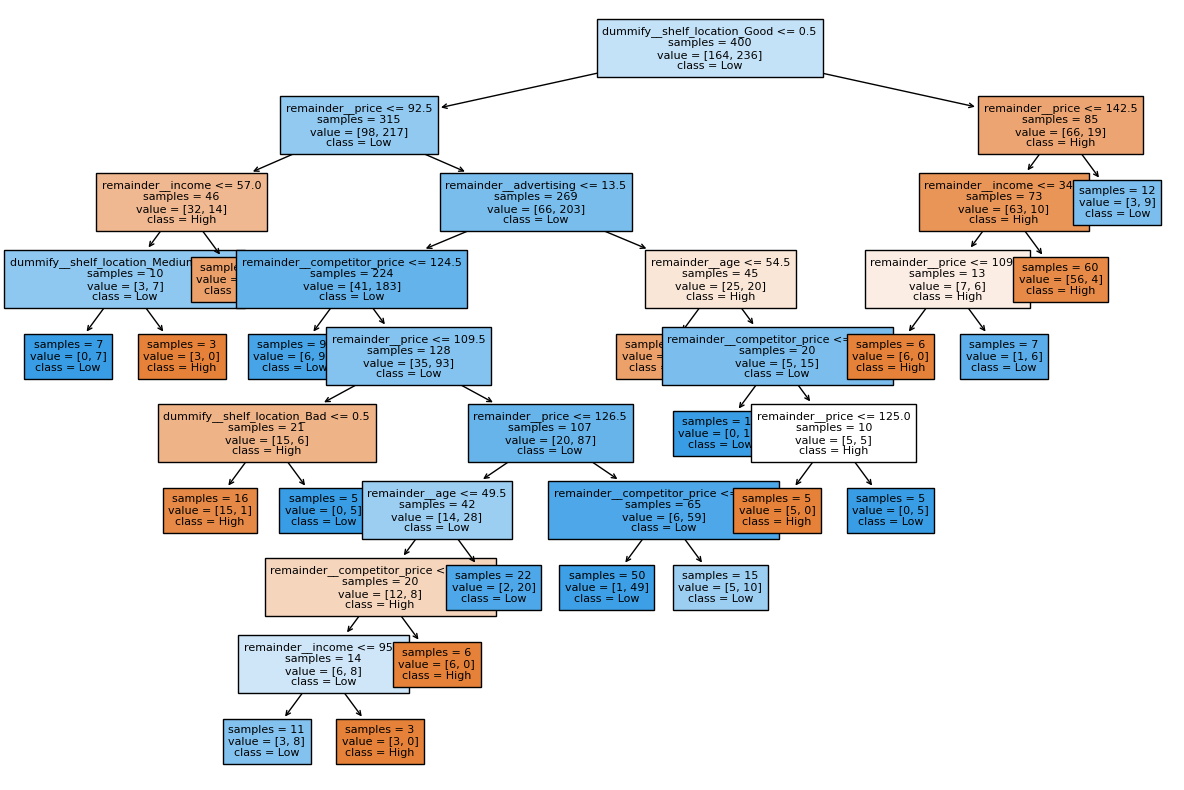

In [5]:
## Classification Tree (Max Depth = 20)
tree_pipeline = Pipeline(
  [('preprocessing', column_transformer),
    ('tree', DecisionTreeClassifier(max_depth=20, max_leaf_nodes=20))]
).set_output(transform='pandas')

# Fit and plot tree
tree_fitted = tree_pipeline.fit(X_train, y_train)

plt.figure(figsize=(15,10)) #adjust width and height of the figure to make your tree readable
tree.plot_tree(tree_fitted['tree'], feature_names = list(column_transformer.transform(X_train).columns),
                filled = True, class_names = sorted(list(data['sales_cat'].unique())), impurity = False, fontsize = 8
    )